# Question 
#### Step 1) Read the following articles using Beautifulsoup Python library provided to you
#### Step 2) Using the above code build the Cosine Similarity Matrix using CountVectorizer and TFIDFVectorizer 
#### Step 3) Plot Similarity Matrix using CountVectorizer and TFIDFVectorizer 

##### URLs:
<li> https://en.wikipedia.org/wiki/World_War_II
<li> https://en.wikipedia.org/wiki/World_War_I 
<li> https://en.wikipedia.org/wiki/War_of_1812
<li> https://en.wikipedia.org/wiki/Basketball
<li> https://en.wikipedia.org/wiki/Association_football

In [25]:
#import libraries
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import spatial
import nltk
import urllib.parse
import urllib.request
#from urllib.request import Request, urlopen
from urllib.error import URLError
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
#nltk.download('punkt')

In [3]:
urlList = ['https://en.wikipedia.org/wiki/World_War_II',
         'https://en.wikipedia.org/wiki/World_War_I',
         'https://en.wikipedia.org/wiki/War_of_1812',
         'https://en.wikipedia.org/wiki/Basketball',
         'https://en.wikipedia.org/wiki/Association_football']

In [5]:
# dictionary mapping response codes to messages; entries have the
# form {code: (shortmessage, longmessage)}.
responses = {
    100: ('Continue', 'Request received, please continue'),
    101: ('Switching Protocols',
          'Switching to new protocol; obey Upgrade header'),

    200: ('OK', 'Request fulfilled, document follows'),
    201: ('Created', 'Document created, URL follows'),
    202: ('Accepted',
          'Request accepted, processing continues off-line'),
    203: ('Non-Authoritative Information', 'Request fulfilled from cache'),
    204: ('No Content', 'Request fulfilled, nothing follows'),
    205: ('Reset Content', 'Clear input form for further input.'),
    206: ('Partial Content', 'Partial content follows.'),

    300: ('Multiple Choices',
          'Object has several resources -- see URI list'),
    301: ('Moved Permanently', 'Object moved permanently -- see URI list'),
    302: ('Found', 'Object moved temporarily -- see URI list'),
    303: ('See Other', 'Object moved -- see Method and URL list'),
    304: ('Not Modified',
          'Document has not changed since given time'),
    305: ('Use Proxy',
          'You must use proxy specified in Location to access this '
          'resource.'),
    307: ('Temporary Redirect',
          'Object moved temporarily -- see URI list'),

    400: ('Bad Request',
          'Bad request syntax or unsupported method'),
    401: ('Unauthorized',
          'No permission -- see authorization schemes'),
    402: ('Payment Required',
          'No payment -- see charging schemes'),
    403: ('Forbidden',
          'Request forbidden -- authorization will not help'),
    404: ('Not Found', 'Nothing matches the given URI'),
    405: ('Method Not Allowed',
          'Specified method is invalid for this server.'),
    406: ('Not Acceptable', 'URI not available in preferred format.'),
    407: ('Proxy Authentication Required', 'You must authenticate with '
          'this proxy before proceeding.'),
    408: ('Request Timeout', 'Request timed out; try again later.'),
    409: ('Conflict', 'Request conflict.'),
    410: ('Gone',
          'URI no longer exists and has been permanently removed.'),
    411: ('Length Required', 'Client must specify Content-Length.'),
    412: ('Precondition Failed', 'Precondition in headers is false.'),
    413: ('Request Entity Too Large', 'Entity is too large.'),
    414: ('Request-URI Too Long', 'URI is too long.'),
    415: ('Unsupported Media Type', 'Entity body in unsupported format.'),
    416: ('Requested Range Not Satisfiable',
          'Cannot satisfy request range.'),
    417: ('Expectation Failed',
          'Expect condition could not be satisfied.'),

    500: ('Internal Server Error', 'Server got itself in trouble'),
    501: ('Not Implemented',
          'Server does not support this operation'),
    502: ('Bad Gateway', 'Invalid responses from another server/proxy.'),
    503: ('Service Unavailable',
          'The server cannot process the request due to a high load'),
    504: ('Gateway Timeout',
          'The gateway server did not receive a timely response'),
    505: ('HTTP Version Not Supported', 'Cannot fulfill request.'),
    }

In [6]:
#define function to get tokens/words
def gettokens (responses,url):
    #url = "https://en.wikipedia.org/wiki/World_War_II"
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'
    values = {'name': 'Michael Foord',
              'location': 'Northampton',
              'language': 'Python' }
    headers = {'User-Agent': user_agent}
    data = urllib.parse.urlencode(values)
    data = data.encode('ascii')
    
    req = urllib.request.Request(url, data, headers)
    try:
        #urllib.request.urlopen(req)
        with urllib.request.urlopen(req) as response:
            html = response.read()
    except URLError as e:
        print('The server couldn\'t fulfill the request.')
        print('Error code: ', responses[e.code])
    except URLError as e:
        print('We failed to reach a server.')
        print('Reason: ', e.reason)
    else:
        print("everything is fine")
        web_str = BeautifulSoup(html, "lxml").get_text()
        #web_tokens = nltk.word_tokenize(web_str)
    
    return web_str


In [11]:
#get tokens for each url in urlList
url_0 = gettokens(responses,urlList[0])
url_1 = gettokens(responses,urlList[1])
url_2 = gettokens(responses,urlList[2])
url_3 = gettokens(responses,urlList[3])
url_4 = gettokens(responses,urlList[4])

#create list of docs
docs = [url_0,url_1,url_2,url_3,url_4]
#print(docs) #

In [46]:
#from sklearn use CountVectorizer
#convert text to matrix with token counts
vect = CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)

#dimensionality reduction on vect
X = vect.fit_transform(docs)

#get feature names
count_df = DataFrame(X.A, columns=vect.get_feature_names())
print (count_df)

#get array of counts
count_ary = count_df.values
print (count_ary)

   1812  978  american  basketball  battle  british  football  german  \
0     0  231        49           0      45       62         0     126   
1     0  153        47           0     130      139         0     212   
2   240   33       326           0     144      392         0       1   
3     0    4        36         342       0        1        23       1   
4     0    9         8           2       0        6       273       0   

   germany  history  involving  isbn  mw  new   pp  retrieved  states  united  \
0      146       78        149   234  41   77  128         40      76     108   
1      167      111         88   157  48  115  101         79      68      65   
2        0       72          9    94  73  120   82         41     187     180   
3        1       11          2    10  37   22    2         68      28      27   
4        4       28          3    10  44    3    3         90       9       9   

   war  world  
0  415    178  
1  709    272  
2  574     16  
3    5    

[[1.         0.92970986 0.66200175 0.11543721 0.15540254]
 [0.92970986 1.         0.73869087 0.10623293 0.15638635]
 [0.66200175 0.73869087 1.         0.11346927 0.09101225]
 [0.11543721 0.10623293 0.11346927 1.         0.17386267]
 [0.15540254 0.15638635 0.09101225 0.17386267 1.        ]] 



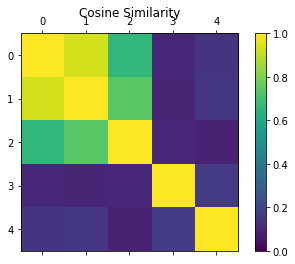

In [47]:
#calculate similarity between different docs, using cosine similarity
correlation= 1-pairwise_distances(count_ary, metric='cosine')
print (correlation,'\n')

#plot cosine similarity heatmap
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.title('Cosine Similarity')
plt.show()

In [48]:
#TFIDF Vectorizer
#term frequency–inverse document frequency
f = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, stop_words="english", analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)
Xi = f.fit_transform(docs)

#get feature names
tfid_df = DataFrame(Xi.A, columns=f.get_feature_names())
print (tfid_df,'\n') #alphabetical order

#get array of counts
tfid_ary = tfid_df.values
print (tfid_ary,'\n')

         1812    978  american  basketball      battle  british    football  \
0    0.000000  231.0      49.0    0.000000   67.987153     62.0    0.000000   
1    0.000000  153.0      47.0    0.000000  196.407331    139.0    0.000000   
2  626.265099   33.0     326.0    0.000000  217.558890    392.0    0.000000   
3    0.000000    4.0      36.0  655.371430    0.000000      1.0   44.074687   
4    0.000000    9.0       8.0    3.832581    0.000000      6.0  523.147370   

       german     germany  history  involving   isbn    mw    new     pp  \
0  154.116087  178.578958     78.0      149.0  234.0  41.0   77.0  128.0   
1  259.306433  204.264973    111.0       88.0  157.0  48.0  115.0  101.0   
2    1.223144    0.000000     72.0        9.0   94.0  73.0  120.0   82.0   
3    1.223144    1.223144     11.0        2.0   10.0  37.0   22.0    2.0   
4    0.000000    4.892574     28.0        3.0   10.0  44.0    3.0    3.0   

   retrieved  states  united    war  world  
0       40.0    76.0   

[[1.         0.92944427 0.5458951  0.06107852 0.08548355]
 [0.92944427 1.         0.61396282 0.05562086 0.08494591]
 [0.5458951  0.61396282 1.         0.05057406 0.04198373]
 [0.06107852 0.05562086 0.05057406 1.         0.10432588]
 [0.08548355 0.08494591 0.04198373 0.10432588 1.        ]] 



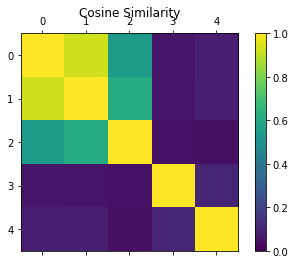

In [49]:
#calculate similarity between different docs, using cosine similarity
correlation= 1-pairwise_distances(tfid_ary, metric='cosine')
print (correlation,'\n')

#plot cosine similarity heatmap
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=0, vmax=1)
fig.colorbar(cax)
plt.title('Cosine Similarity')
plt.show()